Packages

In [ ]:
%pip install pandas
%pip install glob
%pip install geopandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import glob
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

Importing datasets

In [18]:
# List of files
data_folder = 'Data'
csv_files = glob.glob(f"{data_folder}/*.csv")

# Read each CSV file into a DataFrame and store in a list
dataframes = [pd.read_csv(file) for file in csv_files]

#IICA files
csv_iica = glob.glob(f"{data_folder}/*IICA/*.csv")
dataframes_iica = [pd.read_csv(file) for file in csv_iica]

#Fiscal performance files
csv_fisc = glob.glob(f"{data_folder}/*Terridata/*.csv")
dataframes_fisc = [pd.read_csv(file) for file in csv_fisc]


Cleaning datasets

In [4]:
#####################
### IICA datasets ###
#####################

### IICA 2002-2013 ###
dataframes_iica[0] = dataframes_iica[0].iloc[:, :5]
dataframes_iica[0] = dataframes_iica[0].rename(columns={
    'divipola': 'Divipola',
    'Departamento': 'Depto',
    'Municipio': 'Municipio',
    'año': 'year',
    'Índice de indicencia del conflicto': 'iica'
})

dataframes_iica[0]

,Divipola,Depto,Municipio,year,iica
0,5001,ANTIOQUIA,MEDELLÍN,2013,0.008261
1,5002,ANTIOQUIA,ABEJORRAL,2013,0.005499
2,5004,ANTIOQUIA,ABRIAQUÍ,2013,0.000327
3,5021,ANTIOQUIA,ALEJANDRÍA,2013,0.005062
4,5030,ANTIOQUIA,AMAGÁ,2013,0.016015
...,...,...,...,...,...
13459,97889,VAUPÉS,YAVARATÉ,2002,0.000185
13460,99001,VICHADA,PUERTO CARREÑO,2002,0.021377
13461,99524,VICHADA,LA PRIMAVERA,2002,0.010955
13462,99624,VICHADA,SANTA ROSALÍA,2002,0.012447


In [5]:
#####################
### IICA datasets ###
#####################

### IICA 2014-2016 ###
dataframes_iica[1] = pd.melt(dataframes_iica[1], id_vars=dataframes_iica[1].columns[:3], value_vars=dataframes_iica[1].columns[3:5], 
                    var_name='year', value_name='iica')

# Extract only the year number from the 'year' column
dataframes_iica[1]['year'] = dataframes_iica[1]['year'].str.extract('(\d+)').astype(int)

dataframes_iica[1]



<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cpedr\AppData\Local\Temp\ipykernel_20828\3086565869.py:10: SyntaxWarning: invalid escape sequence '\d'
  dataframes_iica[1]['year'] = dataframes_iica[1]['year'].str.extract('(\d+)').astype(int)


,Divipola,Depto,Municipio,year,iica
0,5001,ANTIOQUIA,MEDELLIN,2014,0.00692
1,5002,ANTIOQUIA,ABEJORRAL,2014,0.00738
2,5004,ANTIOQUIA,ABRIAQUI,2014,0.00070
3,5021,ANTIOQUIA,ALEJANDRIA,2014,0.00056
4,5030,ANTIOQUIA,AMAGA,2014,0.00925
...,...,...,...,...,...
2239,97889,VAUPÉS,YAVARATE,2015,0.00000
2240,99001,VICHADA,PUERTO CARREÑO,2015,0.00620
2241,99524,VICHADA,LA PRIMAVERA,2015,0.01250
2242,99624,VICHADA,SANTA ROSALIA,2015,0.00076


In [6]:
### IICA 2017-2022 ###
dataframes_iica[2] = pd.melt(dataframes_iica[2], id_vars=dataframes_iica[2].columns[1:4], value_vars=dataframes_iica[2].columns[4:10], 
                    var_name='year', value_name='iica')

# Extract only the year number from the 'year' column
dataframes_iica[2]['year'] = dataframes_iica[2]['year'].str.extract('(\d+)').astype(int)

dataframes_iica[2]

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cpedr\AppData\Local\Temp\ipykernel_20828\3795539174.py:6: SyntaxWarning: invalid escape sequence '\d'
  dataframes_iica[2]['year'] = dataframes_iica[2]['year'].str.extract('(\d+)').astype(int)


,Divipola,Municipio,Depto,year,iica
0,5001,MEDELLIN,ANTIOQUIA,2017,0.02816
1,5002,ABEJORRAL,ANTIOQUIA,2017,0.00960
2,5004,ABRIAQUI,ANTIOQUIA,2017,0.03638
3,5021,ALEJANDRIA,ANTIOQUIA,2017,0.03846
4,5030,AMAGA,ANTIOQUIA,2017,0.03954
...,...,...,...,...,...
6721,97889,YAVARATE,VAUPÉS,2022,0.00000
6722,99001,PUERTO CARREÑO,VICHADA,2022,0.06498
6723,99524,LA PRIMAVERA,VICHADA,2022,0.03024
6724,99624,SANTA ROSALIA,VICHADA,2022,0.00344


In [7]:
# Merge all IICA datasets
merged_iica = pd.concat(dataframes_iica, ignore_index=True)

# Display the merged dataframe
merged_iica.dtypes

Divipola       int64
Depto         object
Municipio     object
year           int64
iica         float64
dtype: object

In [8]:
##########################
### Fiscal Performance ###
##########################

### New index ###

dataframes_fisc[0] = dataframes_fisc[0][dataframes_fisc[0]['Indicador'] == 'Puntaje nuevo Índice de Desempeño Fiscal']
dataframes_fisc[0]['Dato Numérico'] = dataframes_fisc[0]['Dato Numérico'].str.replace(',', '.').astype(float)
dataframes_fisc[0] = dataframes_fisc[0].iloc[:, [2, 7, 9]]
dataframes_fisc[0] = dataframes_fisc[0].rename(columns={
    'Código Entidad': 'Divipola',
    'Dato Numérico': 'fisc_perf',
    'Año': 'year'
})

dataframes_fisc[0]

,Divipola,fisc_perf,year
22,1001,0.00,2020
23,1001,0.00,2021
48,5000,65.64,2020
49,5000,67.02,2021
74,5001,78.56,2020
...,...,...,...
29455,99524,49.36,2021
29480,99624,44.39,2020
29481,99624,59.72,2021
29506,99773,35.11,2020


In [9]:
### Old Index ###
dataframes_fisc[1] = dataframes_fisc[1][dataframes_fisc[1]['Indicador'] == 'Indicador de desempeño fiscal']
dataframes_fisc[1]['Dato Numérico'] = dataframes_fisc[1]['Dato Numérico'].str.replace(',', '.').astype(float)
dataframes_fisc[1] = dataframes_fisc[1].iloc[:, [2, 7, 9]]
dataframes_fisc[1] = dataframes_fisc[1].rename(columns={
    'Código Entidad': 'Divipola',
    'Dato Numérico': 'fisc_perf',
    'Año': 'year'
})

dataframes_fisc[1]

,Divipola,fisc_perf,year
115,1001.0,NaN,2000.0
116,1001.0,NaN,2001.0
117,1001.0,NaN,2002.0
118,1001.0,NaN,2003.0
119,1001.0,NaN,2004.0
...,...,...,...
166827,99773.0,60.25,2016.0
166828,99773.0,55.16,2017.0
166829,99773.0,NaN,2018.0
166830,99773.0,68.76,2019.0


In [10]:
# Merge all fiscal performance datasets
merged_fisc = pd.concat(dataframes_fisc, ignore_index=True)

# Display the merged dataframe
merged_fisc

,Divipola,fisc_perf,year
0,1001.0,0.00,2020.0
1,1001.0,0.00,2021.0
2,5000.0,65.64,2020.0
3,5000.0,67.02,2021.0
4,5001.0,78.56,2020.0
...,...,...,...
26098,99773.0,60.25,2016.0
26099,99773.0,55.16,2017.0
26100,99773.0,NaN,2018.0
26101,99773.0,68.76,2019.0


In [ ]:
###################
### Shape files ###
###################

# Read the shapefile
shapes = gpd.read_file('Data/shapes/shapes.shp')

shapes

,area,perimeter,dpto,nombre_dpt,mpio,nombre_mpi,nombre_cab,mpios,hectares,geometry
0,1.775410e+09,313036.280961,05,ANTIOQUIA,873,VIGIA DEL FUERTE,VIGIA DEL FUERTE,05873,177540.955,"POLYGON ((-76.90331 6.83561, -76.90562 6.82957..."
1,8.723712e+08,151181.011238,05,ANTIOQUIA,686,SANTA ROSA DE OSOS,SANTA ROSA DE OSOS,05686,87237.121,"POLYGON ((-75.6099 6.8743, -75.6071 6.8708, -7..."
2,1.317151e+09,178275.152241,05,ANTIOQUIA,284,FRONTINO,FRONTINO,05284,131715.082,"POLYGON ((-76.2441 6.9174, -76.2227 6.9167, -7..."
3,8.223566e+07,44796.540606,05,ANTIOQUIA,315,GUADALUPE,GUADALUPE,05315,8223.566,"POLYGON ((-75.2312 6.9374, -75.2232 6.9287, -7..."
4,3.959024e+08,113140.065596,68,SANTANDER,895,ZAPATOCA,ZAPATOCA,68895,39590.242,"POLYGON ((-73.2425 6.9088, -73.2309 6.9047, -7..."
...,...,...,...,...,...,...,...,...,...,...
1117,1.110146e+08,55343.749206,47,MAGDALENA,205,CONCORDIA,CONCORDIA,47205,11101.462,"POLYGON ((-74.69577 10.22744, -74.69933 10.226..."
1118,3.415701e+08,105759.091575,47,MAGDALENA,960,ZAPAYAN,ZAPAYAN,47960,34157.008,"POLYGON ((-74.70518 10.27644, -74.69872 10.263..."
1119,5.837940e+08,151715.069375,17,CALDAS,380,LA DORADA,LA DORADA,17380,58379.399,"POLYGON ((-74.6766 5.7584, -74.6754 5.7463, -7..."
1120,2.816016e+09,359760.445480,27,CHOCO,150,CARMEN DEL DARIEN,CARMEN DEL DARIEN,27150,281601.625,"POLYGON ((-76.89271 7.24821, -76.89113 7.22927..."


In [134]:
dataframes[1].dtypes

country              object
subnational1         object
subnational2         object
threshold             int64
area_ha               int64
extent_2000_ha        int64
extent_2010_ha        int64
gain_2000-2020_ha     int64
tc_loss_ha_2001       int64
tc_loss_ha_2002       int64
tc_loss_ha_2003       int64
tc_loss_ha_2004       int64
tc_loss_ha_2005       int64
tc_loss_ha_2006       int64
tc_loss_ha_2007       int64
tc_loss_ha_2008       int64
tc_loss_ha_2009       int64
tc_loss_ha_2010       int64
tc_loss_ha_2011       int64
tc_loss_ha_2012       int64
tc_loss_ha_2013       int64
tc_loss_ha_2014       int64
tc_loss_ha_2015       int64
tc_loss_ha_2016       int64
tc_loss_ha_2017       int64
tc_loss_ha_2018       int64
tc_loss_ha_2019       int64
tc_loss_ha_2020       int64
tc_loss_ha_2021       int64
tc_loss_ha_2022       int64
tc_loss_ha_2023       int64
dtype: object

In [11]:
#####################
### Deforestation ###
#####################

# Select only numeric columns
numeric_cols = dataframes[1].select_dtypes(include=[np.number]).columns

# Group by 'subnational1' and 'subnational2' and calculate the mean for tree cover loss for all thresholds
dataframes[1] = dataframes[1].groupby(['subnational1', 'subnational2'])[numeric_cols].mean()
dataframes[1].reset_index(inplace=True)
dataframes[1] = dataframes[1].iloc[:, list(range(0, 2)) + list(range(7, dataframes[1].shape[1]))]

# Wide to long
dataframes[1] = pd.melt(dataframes[1], id_vars=dataframes[1].columns[0:2], value_vars=dataframes[1].columns[2:], 
                    var_name='year', value_name='tc_loss')

# Extract only the year number from the 'year' column
dataframes[1]['year'] = dataframes[1]['year'].str.extract('(\d+)').astype(int)

dataframes[1]


<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cpedr\AppData\Local\Temp\ipykernel_20828\2945547082.py:18: SyntaxWarning: invalid escape sequence '\d'
  dataframes[1]['year'] = dataframes[1]['year'].str.extract('(\d+)').astype(int)


,subnational1,subnational2,year,tc_loss
0,Amazonas,El Encanto,2001,212.000
1,Amazonas,La Chorrera,2001,285.000
2,Amazonas,La Pedrera,2001,139.000
3,Amazonas,Leticia,2001,180.750
4,Amazonas,Mirití-Paraná,2001,125.000
...,...,...,...,...
24490,Vichada,La Primavera,2023,338.125
24491,Vichada,Puerto Carreño,2023,199.500
24492,Vichada,San Jose de Ocune,2023,2375.250
24493,Vichada,Santa Rita,2023,917.375


In [12]:
dataframes[1]

,subnational1,subnational2,year,tc_loss
0,Amazonas,El Encanto,2001,212.000
1,Amazonas,La Chorrera,2001,285.000
2,Amazonas,La Pedrera,2001,139.000
3,Amazonas,Leticia,2001,180.750
4,Amazonas,Mirití-Paraná,2001,125.000
...,...,...,...,...
24490,Vichada,La Primavera,2023,338.125
24491,Vichada,Puerto Carreño,2023,199.500
24492,Vichada,San Jose de Ocune,2023,2375.250
24493,Vichada,Santa Rita,2023,917.375


# 

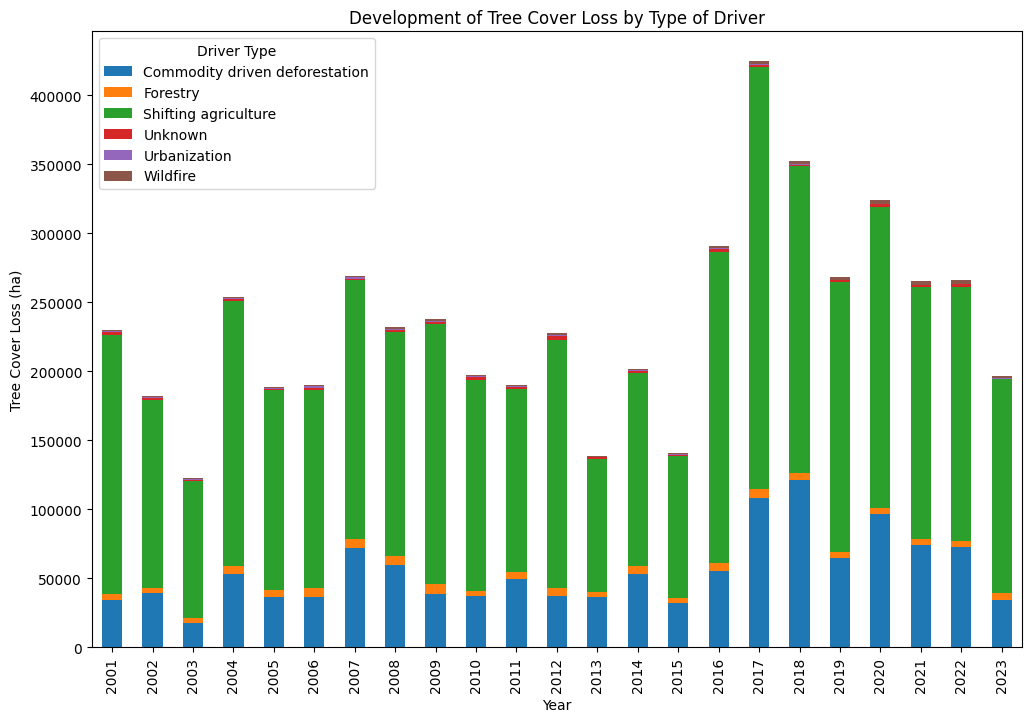

In [ ]:
#######################################
### Deforestation by type of driver ###
#######################################

# Deforestation data by type of driver
df_deforestation = dataframes[3]

# Pivot the dataframe to have years as index and types as columns
df_pivot = df_deforestation.pivot(index='umd_tree_cover_loss__year', columns='tsc_tree_cover_loss_drivers__driver', values='umd_tree_cover_loss__ha')

# Plot the bar graph
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Development of Tree Cover Loss by Type of Driver')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.legend(title='Driver Type')
plt.show()

In [20]:
# Calculate the total tree cover loss by year
df_pivot['Total'] = df_pivot.sum(axis=1)

# Calculate the percentage of "Shifting agriculture" for each year
df_pivot['Shifting_agriculture_percentage'] = (df_pivot['Shifting agriculture'] / df_pivot['Total']) * 100

# Calculate the average percentage of "Shifting agriculture"
average_shifting_agriculture_percentage = df_pivot['Shifting_agriculture_percentage'].mean()

print(f"Average percentage of Shifting agriculture: {average_shifting_agriculture_percentage:.2f}%")

Average percentage of Shifting agriculture: 73.50%


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming you have two DataFrames: df1 (2005-2009) and df2 (2011-2022)
# Combine the two DataFrames
combined_df = pd.concat([df1, df2])

# Set 'year' as index for interpolation and extrapolation
combined_df.set_index('year', inplace=True)

# Interpolate linearly to fill in 2010
combined_df = combined_df.reindex(range(2005, 2023))  # include 2010 in index range
combined_df['GDP'] = combined_df['GDP'].interpolate(method='linear')

# Prepare data for polynomial regression
years = combined_df.dropna().index.values.reshape(-1, 1)
gdp = combined_df.dropna()['GDP'].values

# Fit polynomial regression model
poly = PolynomialFeatures(degree=2)
years_poly = poly.fit_transform(years)
model = LinearRegression().fit(years_poly, gdp)

# Predict GDP for years before 2005
years_before_2005 = np.arange(2000, 2005).reshape(-1, 1)
years_before_2005_poly = poly.transform(years_before_2005)
gdp_before_2005 = model.predict(years_before_2005_poly)

# Add predicted values to the DataFrame
for year, gdp_value in zip(years_before_2005.flatten(), gdp_before_2005):
    combined_df.loc[year] = gdp_value

# Sort the DataFrame by year
combined_df.sort_index(inplace=True)

print(combined_df)